In [1]:
import collections, time
start = time.clock()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [2]:
text = "Learn, How to write your own function; To' count. the number of times a unique word appears in a given string text"


def count_words(text):
    text = text.lower()
    skips = [",", ".", "'", '"', ";", ":", "(", ")", "`"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts


def count_words_fast(text):
    text = text.lower()
    skips = [",", ".", "'", '"', ";", ":", "(", ")", "`"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = collections.Counter(text.split(" "))
    return word_counts


n = count_words_fast(text)
print(len(n.values()))

20


In [3]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [4]:
count_words(text) is count_words_fast(text)

False

In [5]:
def read_book(title_path):
    with open(title_path, "r", encoding="utf8") as current_book:
        text = current_book.read()
    text = text.replace("\n", "").replace("\r", "")
    return text

book = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")

In [6]:
ind = book.find("What's in a name?")
book[ind: ind+1000]

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [7]:
def word_stats(word_counts):
    num_unique_words = len(word_counts)
    count = word_counts.values()
    return (num_unique_words, count)

book1 = read_book("Books/English/shakespeare/Romeo and Juliet.txt")
(num_unique_words, count) = word_stats(count_words_fast(book1))
print(f"Title: Romeo and Juliet\n\nEnglish\nNo. of unique words: {num_unique_words}\nTotal Words: {sum(count)}")
book2 = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
(num_unique_words, count) = word_stats(count_words_fast(book2))
print(f"\nGerman\nNo. of unique words: {num_unique_words}\nTotal Words: {sum(count)}")

Title: Romeo and Juliet

English
No. of unique words: 5083
Total Words: 40776

German
No. of unique words: 7485
Total Words: 20311


In [8]:
# Read all the books
import pandas as pd
import os

books = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
row = 1
book_dir = "./Books/"
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            input_file = book_dir + "/" + language + "/" + author + "/" + title
            print(title.replace(".txt", ""))
            text = read_book(input_file)
            (num_unique_words, count) = word_stats(count_words_fast(text))
            books.loc[row] = language, author.capitalize(), title.replace(".txt", ""), sum(count), num_unique_words
            row += 1
            
books.head()

Der Barometermacher auf der Zauberinsel
Das MÑdchen aus der Feenwelt
Der Alpenkînig und der Menschenfeind
Der Verschwender
Die gefesselte Phantasie
Moisasurs Zauberfluch
Der Diamant des Geisterkînigs
Die unheilbringende Krone
der junge gelehrte
philotas
der freigeist
die juden
hamburgische dramaturgie
minna von barnhelm
miss sara sampson
emilia galotti
Die Verschwîrung des Fiesco zu Genua
Die Piccolomini
Wallensteins Tod
Kabale und Liebe
Die Huldigung der KÅnste
die braut von messina
Wallensteins Lager
Die Jungfrau von Orleans
Der Neffe als Onkel
Turandot, Prinzessin von China
Der Parasit, oder die Kunst, sein GlÅck zu machen
Othello
Der Kaufmann von Venedig
Richard III
Ein Sommernachtstraum
Romeo und Julia
Macbeth
Hamlet
Os fidalgos da Casa Mourisca
Uma fam°lia ingleza
A Morgadinha dos Cannaviaes
A Rel°quia
A Cidade e as Serras
O crime do padre Amaro
Os Maias
O Mandarim
O Primo Bazilio
A Illustre Casa de Ramires
Cartas de Inglaterra
A correspondància de Fradique Mendes
Hamlet
A

,language,author,title,length,unique
1,German,Raimund,Der Barometermacher auf der Zauberinsel,16032,5204
2,German,Raimund,Das MÑdchen aus der Feenwelt,21040,6310
3,German,Raimund,Der Alpenkînig und der Menschenfeind,21802,6841
4,German,Raimund,Der Verschwender,25106,7189
5,German,Raimund,Die gefesselte Phantasie,16651,5681


In [9]:
books

,language,author,title,length,unique
1,German,Raimund,Der Barometermacher auf der Zauberinsel,16032,5204
2,German,Raimund,Das MÑdchen aus der Feenwelt,21040,6310
3,German,Raimund,Der Alpenkînig und der Menschenfeind,21802,6841
4,German,Raimund,Der Verschwender,25106,7189
5,German,Raimund,Die gefesselte Phantasie,16651,5681
...,...,...,...,...,...
98,English,Shakespeare,A Midsummer Night's Dream,16103,4345
99,English,Shakespeare,The Merchant of Venice,20949,4978
100,English,Shakespeare,Romeo and Juliet,40776,5083
101,English,Shakespeare,Macbeth,16874,4780


In [10]:
# Book stats analysis
print(books.length)
print(books.language)

1      16032
2      21040
3      21802
4      25106
5      16651
       ...  
98     16103
99     20949
100    40776
101    16874
102    28551
Name: length, Length: 102, dtype: object
1       German
2       German
3       German
4       German
5       German
        ...   
98     English
99     English
100    English
101    English
102    English
Name: language, Length: 102, dtype: object


In [11]:
books[books.language == "English"]

,language,author,title,length,unique
96,English,Shakespeare,Othello,26590,5898
97,English,Shakespeare,Richard III,48315,5428
98,English,Shakespeare,A Midsummer Night's Dream,16103,4345
99,English,Shakespeare,The Merchant of Venice,20949,4978
100,English,Shakespeare,Romeo and Juliet,40776,5083
101,English,Shakespeare,Macbeth,16874,4780
102,English,Shakespeare,Hamlet,28551,6776


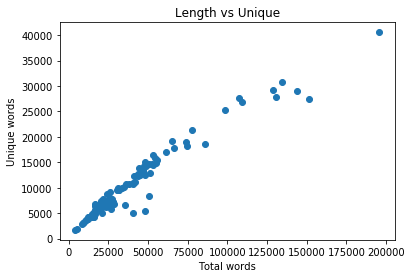

In [12]:
import matplotlib.pyplot as plt

plt.plot(books.length, books.unique, "o");
plt.xlabel("Total words")
plt.ylabel("Unique words")
plt.title("Length vs Unique")
plt.savefig("./figures/len_unique.pdf")

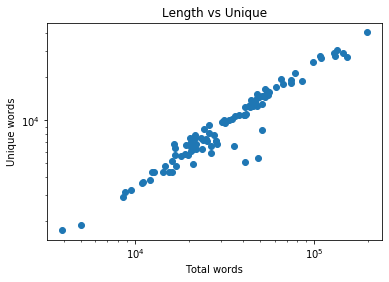

In [13]:
plt.loglog(books.length, books.unique, "o");
plt.xlabel("Total words")
plt.ylabel("Unique words")
plt.title("Length vs Unique")
plt.savefig("./figures/len_unique_loglog.pdf")

In [14]:
# Get the unique values from a column
books.language.unique()

array(['German', 'Portuguese', 'French', 'English'], dtype=object)

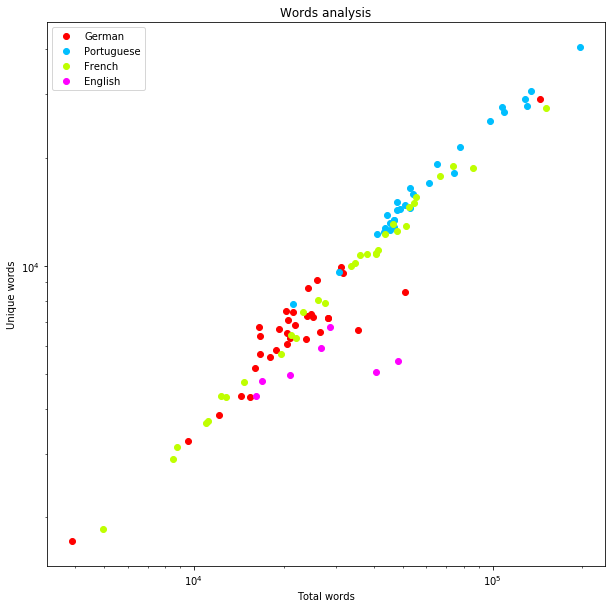

In [15]:
plt.figure(figsize=(10,10))
plt.xlabel("Total words")
plt.ylabel("Unique words")
plt.title("Words analysis")
languages = books.language.unique()
colors = ["#ff0000", "#00bfff", "#bfff00", "#ff00ff"]
for i in range(len(languages)):
    subset = books[books.language == languages[i]]
    plt.loglog(subset.length, subset.unique, "o",label = languages[i] , color = colors[i])
plt.legend()
plt.savefig("./figures/lang_analysis.pdf")

In [16]:
!cd figures/ && ls
end = time.clock()
print(end - start)

lang_analysis.pdf  len_unique_loglog.pdf  len_unique.pdf
3.064491


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
